In [ ]:
#LP3 ML: Uber ride price prediction using linear regression and random forest regression models.
# Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
# Perform following tasks:
# 1.  Pre-process the dataset.
# 2.  Identify outliers.
# 3.  Check the correlation.
# 4.  Implement linear regression and random forest regression models.
# 5.  Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [7]:
import pandas as pd
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [8]:
#checking for null values
df[df.isnull().any(axis=1)]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,2013-07-02 03:51:57.0000001,24.1,2013-07-02 03:51:57 UTC,-73.950581,40.779692,NaN,NaN,0


In [9]:
#since there is only one missing value, we will replace value with median value
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)
#checking for null values
df[df.isnull().any(axis=1)]
#no more missing values

<ipython-input-9-fbe7a0580d5f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
<ipython-input-9-fbe7a0580d5f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [10]:
#datatypes of the columns
df.dtypes

,0
Unnamed: 0,int64
key,object
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


In [11]:
#changing the datatype of pickup_datetime from object to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
#renamining Unnamed column as key and dropping key column
df.drop(['key', 'Unnamed: 0'], axis=1, inplace=True)

In [12]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [13]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [14]:
df.shape

(200000, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  200000 non-null  float64            
 5   dropoff_latitude   200000 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB


In [16]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525299,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [17]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
              day= df.pickup_datetime.dt.day,
              month = df.pickup_datetime.dt.month,
              year = df.pickup_datetime.dt.year,
              dayofweek = df.pickup_datetime.dt.dayofweek)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


In [18]:
# The following can be considered as outliers in this case study:
# 1. Amount < -52
# 2. Trips with travel distance less than or equal to 0, and more than 130Kms
# 3. Trips where 90< latitude <-90, 180 < longitude < -180
# df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

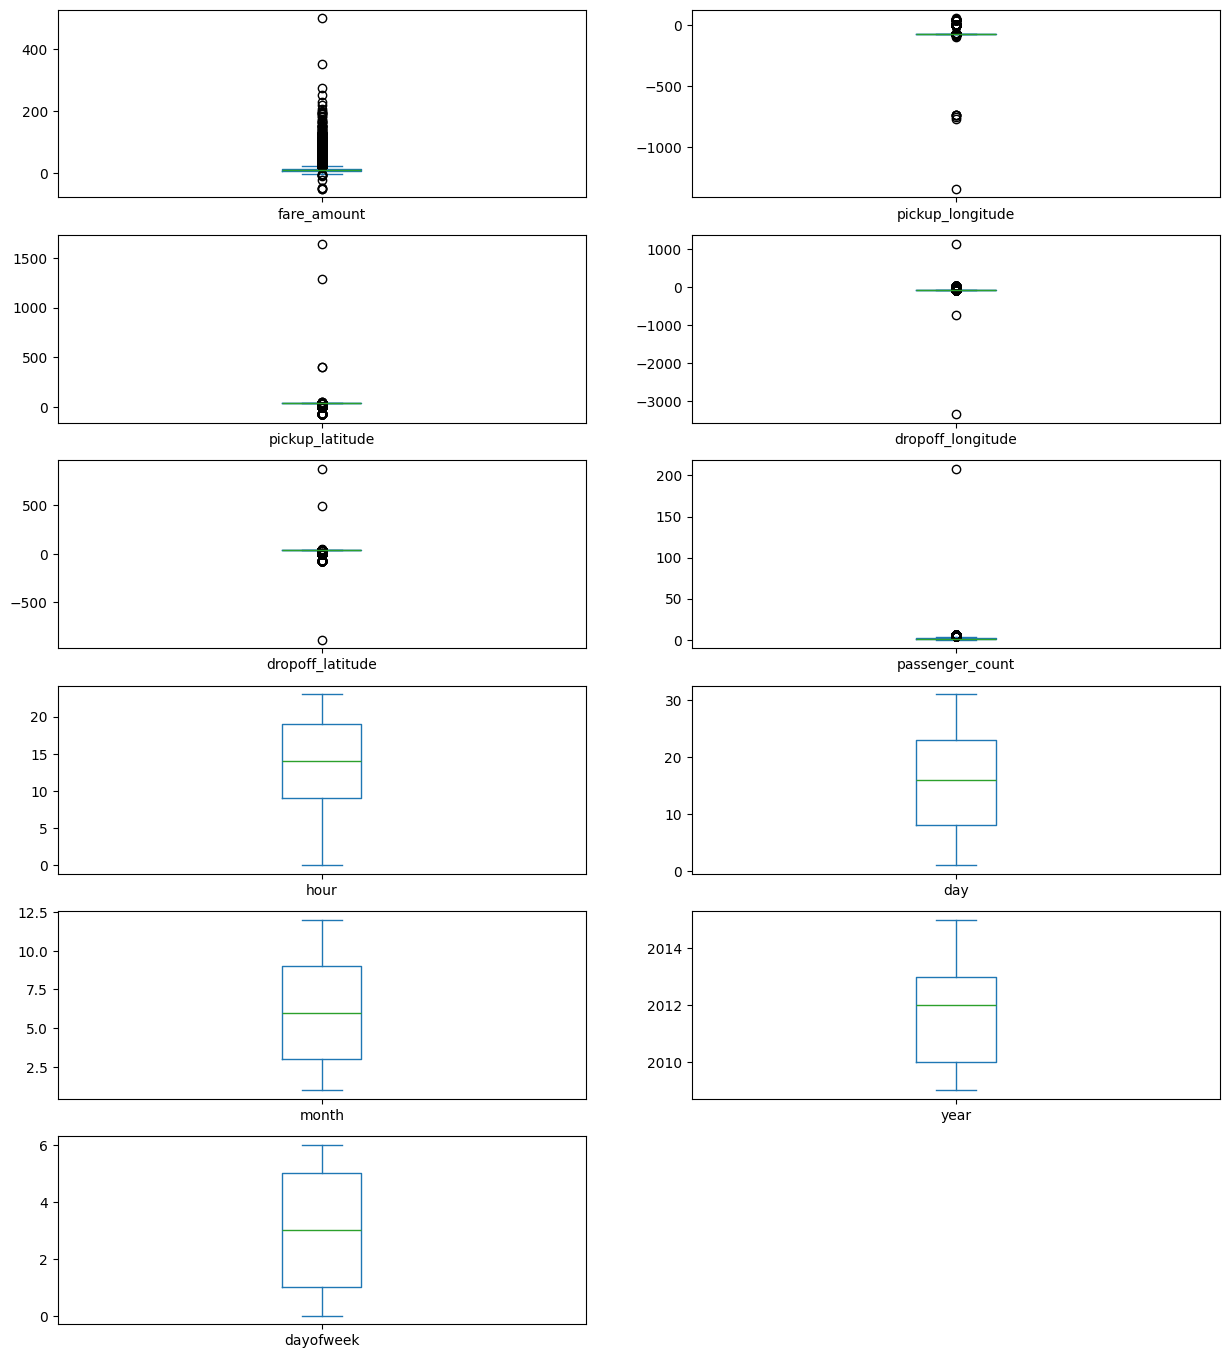

In [21]:
#Outliers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def handleOutliers(temp_df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  higher = Q3 + 1.5*IQR
  temp_df[col] = np.clip(temp_df[col], lower, higher)
  return temp_df

df.plot(kind = "box",subplots = True, layout=(7,2), figsize=(15, 20))

for col in df.columns:
  df = handleOutliers(df, col)


AFTER TREATING OUTLIERS


,0
fare_amount,"Axes(0.125,0.786098;0.352273x0.0939024)"
pickup_longitude,"Axes(0.547727,0.786098;0.352273x0.0939024)"
pickup_latitude,"Axes(0.125,0.673415;0.352273x0.0939024)"
dropoff_longitude,"Axes(0.547727,0.673415;0.352273x0.0939024)"
dropoff_latitude,"Axes(0.125,0.560732;0.352273x0.0939024)"
passenger_count,"Axes(0.547727,0.560732;0.352273x0.0939024)"
hour,"Axes(0.125,0.448049;0.352273x0.0939024)"
day,"Axes(0.547727,0.448049;0.352273x0.0939024)"
month,"Axes(0.125,0.335366;0.352273x0.0939024)"
year,"Axes(0.547727,0.335366;0.352273x0.0939024)"


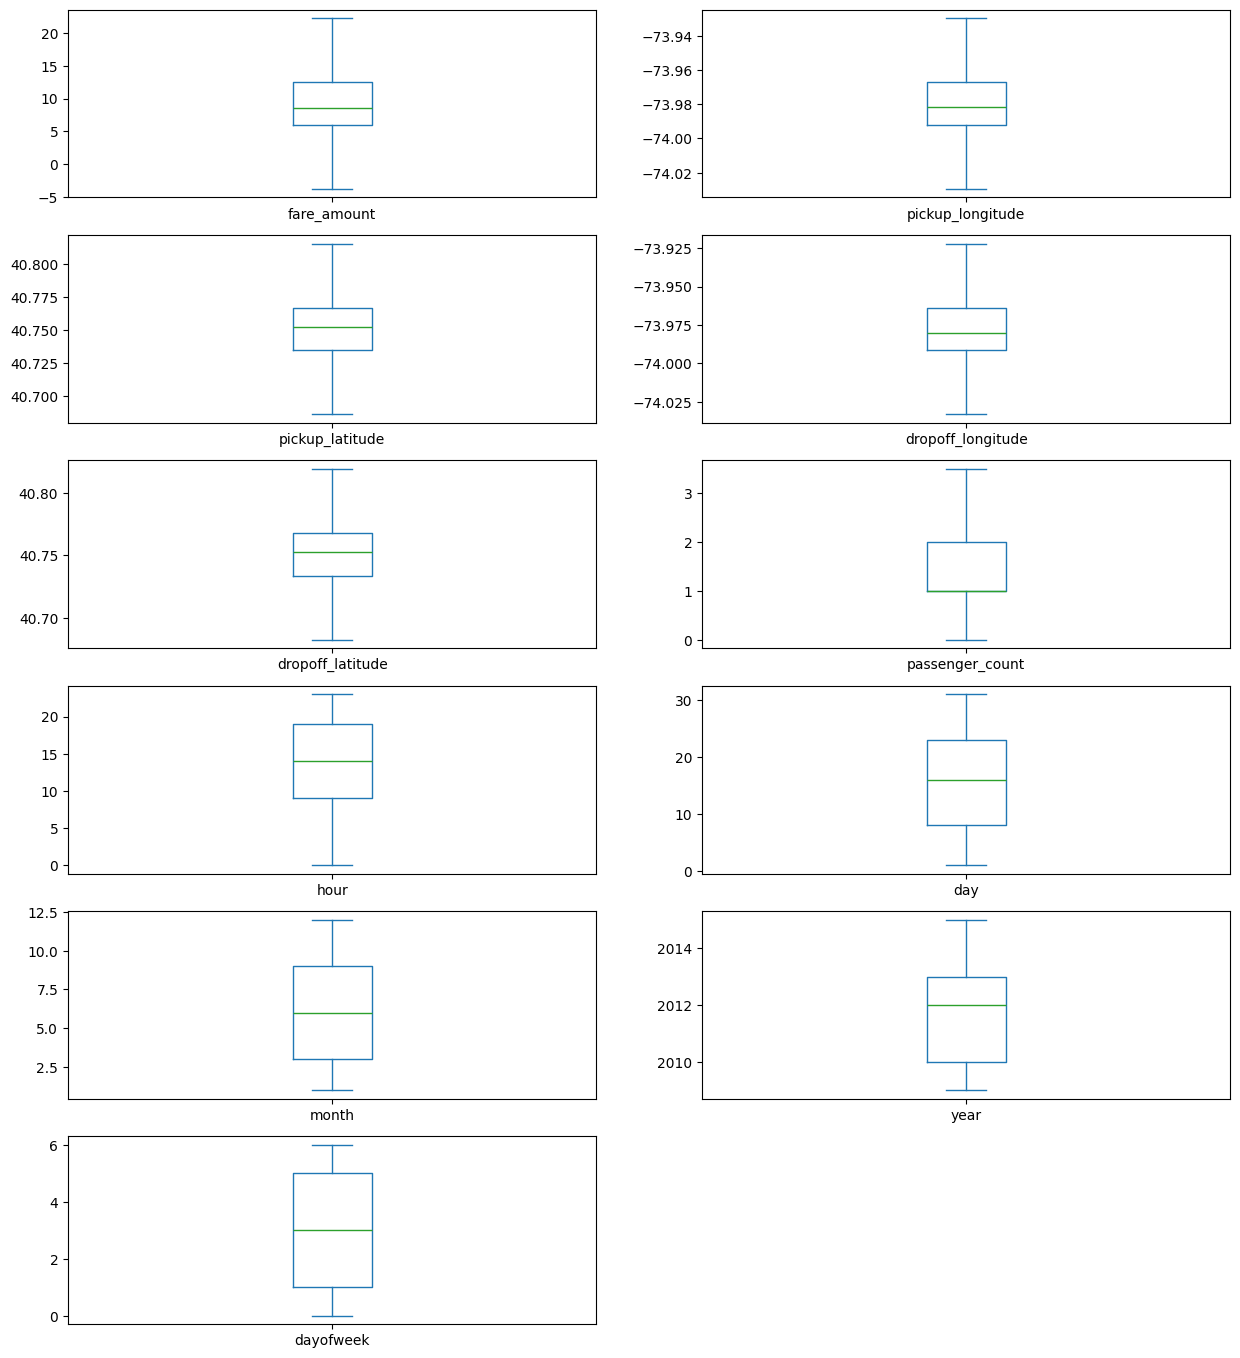

In [22]:

print("AFTER TREATING OUTLIERS")

df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [27]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |
                              (df.pickup_latitude < -90) |
                              (df.dropoff_latitude > 90) |
                              (df.dropoff_latitude < -90) |
                              (df.pickup_longitude > 180) |
                              (df.pickup_longitude < -180) |
                              (df.dropoff_longitude > 90) |
                              (df.dropoff_longitude < -90) ]
incorrect_coordinates

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km


In [24]:
!pip install haversine

In [25]:
import haversine as hs #Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
  long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],
                             df['pickup_latitude'][pos],
                             df['dropoff_longitude'][pos],
                             df['dropoff_latitude'][pos]]
  loc1=(lati1,long1)
  loc2=(lati2,long2)
  c = hs.haversine(loc1,loc2)
  travel_dist.append(c)

df['dist_travel_km'] = travel_dist
df


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.50,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.70,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.90,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.30,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.00,2014-08-28 17:47:00+00:00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6,0.112210
199996,7.50,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,1.875053
199997,22.25,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.922036,40.692588,2.0,0,29,6,2009,0,8.919323
199998,14.50,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2,3.539720


In [26]:
  df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
  df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.50,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.70,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.90,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.30,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.00,2014-08-28 17:47:00+00:00,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6,0.112210
199996,7.50,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,1.875053
199997,22.25,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.922036,40.692588,2.0,0,29,6,2009,0,8.919323
199998,14.50,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1.0,14,20,5,2015,2,3.539720


In [ ]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')
df

<Axes: >

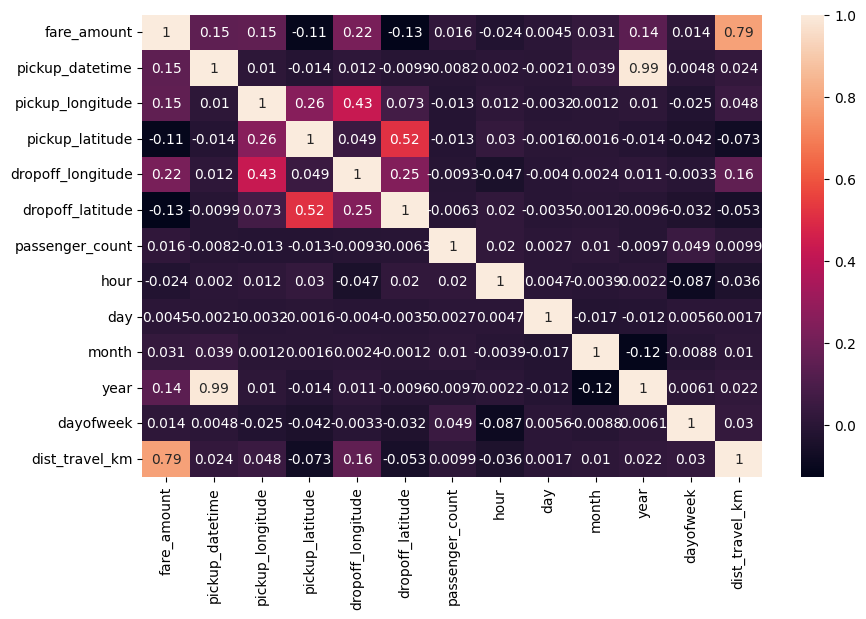

In [28]:
#Correlation
corr = df.corr()
#Function to find the correlation
corr
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)
#Correlation Heatmap (Light values means highly correlated)

In [29]:
#Splitting the data
from sklearn.model_selection import train_test_split

df.drop(["pickup_datetime"], axis=1, inplace = True)
y = df["fare_amount"]
x = df.loc[:, df.columns != "fare_amount"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [30]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print("R2 Score: ", r2_score(y_test, prediction))
print("MSE: ", mean_squared_error(y_test, prediction))

R2 Score:  0.6670201960156569
MSE:  9.833249338662855


In [31]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 30)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

print("R2 Score: ", r2_score(y_test, prediction))
print("MSE: ", mean_squared_error(y_test, prediction))

R2 Score:  0.7893762058460476
MSE:  6.21994565372619
